In [29]:
# Imported Code That Reads MNIST Dataset
# https://www.kaggle.com/code/hojjatk/read-mnist-dataset

import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

training_images_filepath = 'train-images.idx3-ubyte'
training_labels_filepath = 'train-labels.idx1-ubyte'
test_images_filepath = 't10k-images.idx3-ubyte'
test_labels_filepath = 't10k-labels.idx1-ubyte'

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [30]:
# Arrays must be converted to numpy
x_train = np.array(x_train) / 255
y_train = np.array(y_train)
x_test = np.array(x_test) / 255
y_test = np.array(y_test)

# Adds grayscale channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [31]:
from tensorflow.keras import models, layers

# We'll capture low level features in our irst layer, and then use our second layer to caputure higher-level patterns.
# We'll reduce complexity by introducing pooling layers that'll generalize segments
model = models.Sequential([
    # First 2D convolution layer for images, 32 filters with size (3, 3)
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    #First pooling layer, used to downsample and generalize the feature maps by taking the max of each 2x2 region
    layers.MaxPooling2D((2,2)),
    # Second layer uses 64 filters to learn more complex values
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # Converts the 2D feature maps to a 1D vector
    layers.Flatten(),
    # A fully connected dense layer with 128 nuerons
    layers.Dense(128, activation='relu'),
    # Output layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Loss is chosen specifically for multi-class classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.8943 - loss: 0.3603 - val_accuracy: 0.9823 - val_loss: 0.0534
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 100s 106ms/step - accuracy: 0.9825 - loss: 0.0558 - val_accuracy: 0.9864 - val_loss: 0.0443
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 74ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.9904 - val_loss: 0.0292
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9924 - loss: 0.0256 - val_accuracy: 0.9902 - val_loss: 0.0285
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9915 - val_loss: 0.0244


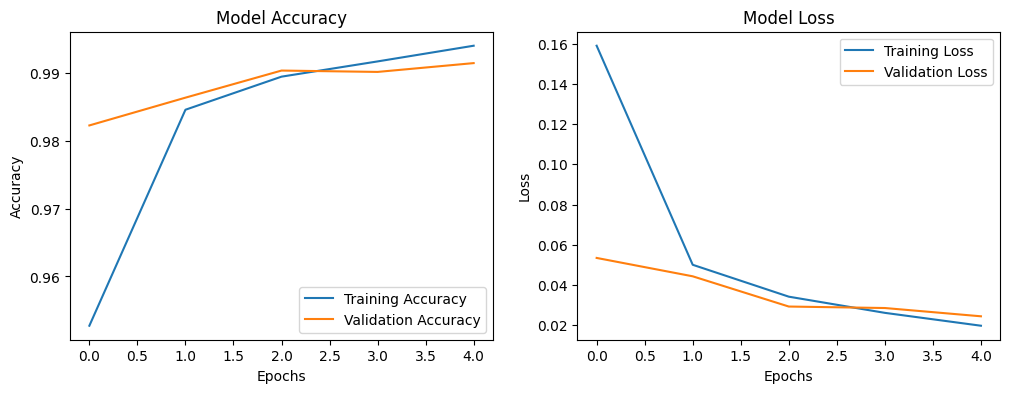

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see the accuracy and loss tend to plateu around 2.5 epochs in. I think adding some epochs could increase accuracy but the retunrs would be diminished. Since our accuracy is already at 99%, we'll choose not to do this to avoid overfitting.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


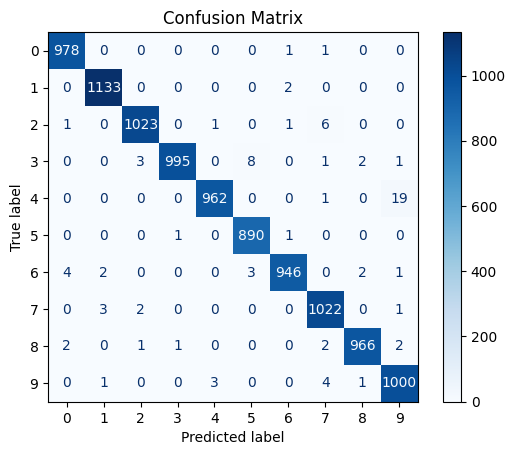

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format = 'd')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix highlights the accuracy of each number category. We can notice some patterns, like how 9 and 4 can get mixed up. There are nineteen instances of 4 being confused with 9, and three instances of 9 being confused with 4.

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {round(test_acc, 2)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9886 - loss: 0.0322
Test accuracy: 0.99
